In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls '/content/drive/MyDrive/Computer_Vision'

Mounted at /content/drive
CameraCalibration.ipynb  Datasets  EpipolarGeometry.ipynb  Files


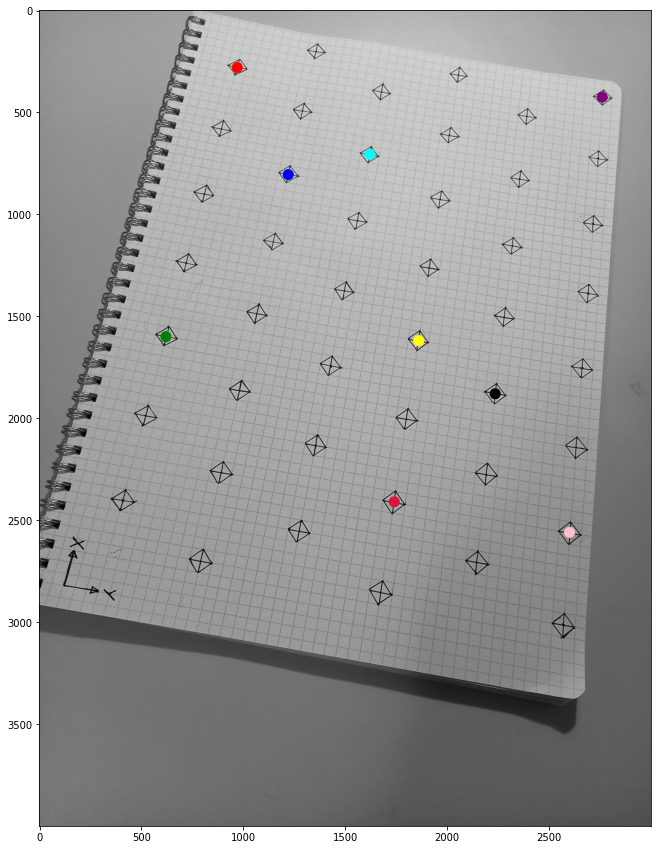

In [116]:
import cv2
import matplotlib.pyplot as plt

def show( U, V, col, size=5 ):
    image = cv2.imread( '/content/drive/MyDrive/Computer_Vision/Files/CameraCalibration2.jpg' )
    image = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY)


    plt.figure( figsize=(25,15) )
    plt.subplot( 1,2,1 )
    plt.imshow( image, cmap='gray' )
    plt.scatter( U, V, c=col, s=size )
    plt.show()


U = [ 970,  620, 1220, 1620,    1860, 2760, 1740, 2600,   2235 ]
V = [ 280, 1600,  805,  705,    1620,  425, 2410, 2560,   1880 ]
col = [ 'red', 'green', 'blue', 'cyan', 'yellow', 'purple', 'crimson', 'pink', 'black']
show( U, V, col, 100 )

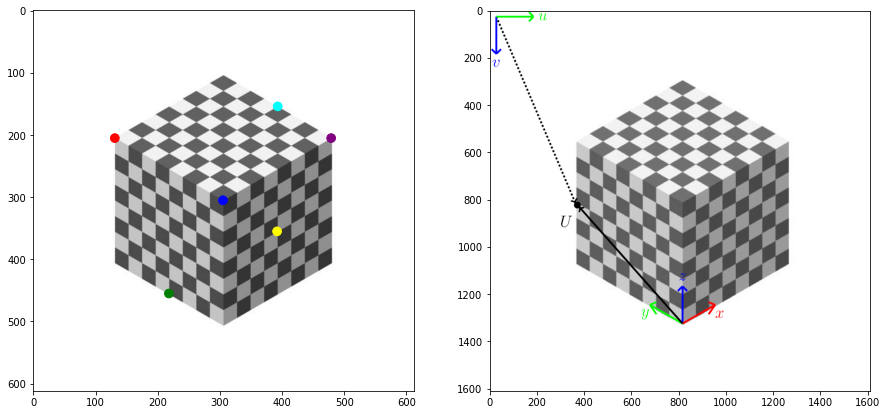

In [198]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread( '/content/drive/MyDrive/Computer_Vision/Files/Image.jpg' )
frame = cv2.imread( '/content/drive/MyDrive/Computer_Vision/Files/Frame.png' )

U = [131, 218,  305, 393, 392, 479]
V = [205, 455,  305, 154, 355, 205]
col = [ 'red', 'green', 'blue', 'cyan', 'yellow', 'purple']

plt.figure( figsize=(15,7.5) )
plt.subplot( 1,2,1 )
plt.imshow( image )
plt.scatter( U, V, c=col, s=75 )
plt.subplot( 1,2,2 )
plt.imshow( frame )
plt.show()

# Camera Calibration Equations:


<img src="https://drive.google.com/uc?export=view&id=1iN7AJjVKHrJwjcUplrhga5El4Liaz10K" width="400"/>


*Intrinsic/Extrinsic Parameters: Projection Matrix*  

\begin{gather}
  P_{3*4} =
  K_{3*3} 
  *
  [ R_{3*3} | t_{3*1} ]
  = M_{int} * M_{ext}
\end{gather}

\begin{gather}
  K =
  \begin{bmatrix}
    f_{x} & s & o_{x}\\
    0 & f_{y} & o_{y}\\
    0 & 0 & 1\\
  \end{bmatrix}
\end{gather}

*From 3D to camera coordinates: homogenous coordinates*

\begin{gather}
  \tilde{U}_{c} = 
  \begin{bmatrix}
    u^{(i)} \\
    v^{(i)} \\
    1 \\
  \end{bmatrix}
\end{gather}

\begin{gather}
  \tilde{U}_{w} = 
  \begin{bmatrix}
    x^{(i)} \\
    y^{(i)} \\
    z^{(i)} \\
    1 \\
  \end{bmatrix}
\end{gather}

\begin{gather}
  \tilde{U}_{c} = P * \tilde{U}_{w}
\end{gather}

*Which can be written as:*

\begin{gather}
  A * p =
  \begin{bmatrix}
    A_{1} \\
    A_{2} \\
    . \\
    . \\
    A_{n} \\
  \end{bmatrix}
  * p =
  0
\end{gather}


\begin{gather}
  A_{i} =
  \begin{bmatrix}
    x_{w}^{(i)} & y_{w}^{(i)} & z_{w}^{(i)} & 1 & 0 & 0 & 0 & 0 & 
    -u^{(i)} * x_{w}^{(i)} & -u^{(i)} * y_{w}^{(i)} & 
    -u^{(i)} * z_{w}^{(i)} & -u^{(i)}\\
    0 & 0 & 0 & 0 & x_{w}^{(i)} & y_{w}^{(i)} & z_{w}^{(i)} & 1 &
    -v^{(i)} * x_{w}^{(i)} & -v^{(i)} * y_{w}^{(i)} & 
    -v^{(i)} * z_{w}^{(i)} & -v^{(i)}\\
  \end{bmatrix}
\end{gather}

\begin{gather}
  p^{T} =
  \begin{bmatrix}
    p11 &
    p12 &
    p13 &
    p14 &
    p21 &
    p22 &
    p23 &
    p24 &
    p31 &
    p32 &
    p33 &
    p34 &
  \end{bmatrix}
\end{gather}



In [186]:
import numpy as np
from math import sqrt
from random import randint


# # Real world, distance between 2 squares:
# dist = 4   # 4 centimetres

# # U coordinates in the world frame (x,y,z)
# X = sqrt(0.5) * np.array( [ 2.5*dist, 6.5*dist, 5.0*dist, 5.5*dist, 3.0*dist, 7.0*dist,    1.0*dist, 1.0*dist, 2.5*dist] )
# Y = sqrt(1.0) * np.array( [ 0.0*dist, 0.0*dist, 1.0*dist, 2.0*dist, 3.0*dist, 5.0*dist,    3.0*dist, 5.0*dist, 4.0*dist] )
# Z = sqrt(0.5) * np.array( [ 2.5*dist, 6.5*dist, 5.0*dist, 5.5*dist, 3.0*dist, 7.0*dist,    1.0*dist, 1.0*dist, 2.5*dist] )
# # Z = 6 * [0] pose a problem : rank( A.T @ A) would be < 12

# # U coordinates in the camera frame (u,v)
# U = [ 970,  620, 1220,     1620, 1860, 2760,          1740, 2600,  2235 ]
# V = [ 280, 1600,  805,      705, 1620,  425,          2410, 2560,  1880 ]


d = 10
# U coordinates in the world frame (x,y,z)
X = [ 0, 0,   0,   d,   d/2, d]
Y = [ d, d/2, 0,   d/2, 0,   0]
Z = [ d, 0,   d,   d,   d/2, d]

# U coordinates in the camera frame (u,v)
U = [131, 218,  305, 393, 392, 479 ]
V = [205, 455,  305, 154, 355, 205 ]

# Calculate A:
N = 6
A = np.zeros( (2*N, 12) )
for n in range(N):
    A[2*n] = np.array([ X[n], Y[n], Z[n], 1, 0, 0, 0, 0, -U[n]*X[n], -U[n]*Y[n], -U[n]*Z[n], -U[n] ])
    A[2*n+1] = np.array([ 0, 0, 0, 0, X[n], Y[n], Z[n], 1, -V[n]*X[n], -V[n]*Y[n], -V[n]*Z[n], -V[n] ])

# Solve the equation A*p = 0:

\begin{gather}
    A * p = 0
\end{gather}


*P is only defined up to a scale => ||p|| = 1* (and to avoid trivial solution p = 0)

\begin{gather}
    \underset{p}{min} || A*p ||^{2}
\end{gather}

\begin{gather}
    || p || = 1
\end{gather}

Loss function:

\begin{gather}
    L(p, \lambda) = p^{T} * A^{T} * A * p - \lambda * ( p^{T} * p -1 )
\end{gather}

*Equavilent to: (Derivative)*

\begin{gather}
    A^{T} * A * p = \lambda * p
\end{gather}

The solution is the eigenvector of A.T @ A associated with the smallest eigenvalue.

In [199]:
# P is only defined up to a scale => ||p|| = 1 
# find eigenvector with smallest eigenvalue: A.T * A * p = lambda * p 
w, v = np.linalg.eig( A.T @ A ) 
idx_min = np.argmin( w)
p = v.T[idx_min] 

P = p.reshape(3, 4)

n = randint( 0, len(X)-1 )
Vv = P @ np.array( [ X[n], Y[n], Z[n], 1 ])  
print( 'Ground Truth:\n', f' [u, v, 1] = [ {U[n]}, {V[n]}, 1 ]', '\n\nPrediction:\n  [u, v, 1] =', Vv/Vv[2]  )

Ground Truth:
  [u, v, 1] = [ 393, 154, 1 ] 

Prediction:
  [u, v, 1] = [392.89540525 153.99903765   1.        ]


# RQ Decomposition:
Use RQ factorization to extract K, R, t:
\begin{gather}
    P = [ K*R | K*T ]
\end{gather}

RQ factorisation:

\begin{gather}
    K*R =
    \begin{bmatrix}
      * & * & *\\
      0 & * & *\\
      0 & 0 & *\\
    \end{bmatrix}
    *
    \begin{bmatrix}
      |  & |  & |\\
      e1 & e2 & e3\\
      |  & |  & |\\
    \end{bmatrix}
\end{gather}

QR factorisation:

\begin{gather}
    R*K =
    \begin{bmatrix}
      |  & |  & |\\
      e1 & e2 & e3\\
      |  & |  & |\\
    \end{bmatrix}
    *
    \begin{bmatrix}
      * & * & *\\
      0 & * & *\\
      0 & 0 & *\\
    \end{bmatrix}
\end{gather}

In [200]:
import scipy.linalg

def factorization(P):
    M = P[:,0:3]
    
    K,R = scipy.linalg.rq(M)
    
    T = np.diag(np.sign(np.diag(K)))
    
    if scipy.linalg.det(T) < 0:
        T[1,1] *= -1
    
    K = np.dot(K,T)
    R = np.dot(T,R)
    
    C = np.dot(scipy.linalg.inv(-M), P[:,3])
    return(K,R,C)


    
K,R,C = factorization(P)

print('Intrinsic Parameters:')
print(K/K[2,2])

print('Rotation:')
print(R)

print('Translation:')
print(C)

L = np.linalg.norm( P - K @ np.array( [ R[:,0], R[:,1], R[:,2], -R @ C ] ).T )
print( '\nDifference between GT and Prediction:\n', L )

Intrinsic Parameters:
[[ 1.14701158e+04 -7.53661644e+01  6.29163967e+02]
 [ 0.00000000e+00  1.11238621e+04  2.86154348e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Rotation:
[[-0.72428351  0.68928393  0.01735105]
 [ 0.27358768  0.26419869  0.92485071]
 [ 0.63290061  0.67460115 -0.37993434]]
Translation:
[ 279.63510873  280.47219339 -270.30260865]

Difference between GT and Prediction:
 4.723355298848326e-15
